In [2]:
# ячейка с кодом, при выполнении которой появится output
2 + 2
import  pandas as pd

In [3]:
df = pd.read_csv('surnames.csv', sep=',')
df

,Unnamed: 0,plural,male,female,title,male_eng,female_eng
0,0,Абаза,Абаза,Абаза,2,abaza,abaza
1,1,Абакумовы,Абакумов,Абакумова,1,abakumov,abakumova
2,2,Абакумовы,Абакумов,Абакумова,3,abakumov,abakumova
3,3,Абакумовы,Абакумов,Абакумова,3,abakumov,abakumova
4,4,Абакумовы,Абакумов,Абакумова,3,abakumov,abakumova
...,...,...,...,...,...,...,...
8665,8665,Яцын,Яцын,Яцына,3,jatsyn,jatsyna
8666,8666,Яцины,Яцин,Яцина,3,jatsin,jatsina
8667,8667,Яшев,Яшев,Яшева,3,jashev,jasheva
8668,8668,Яшмоницкий,Яшмоницкий,Яшмоницкая,2,jashmonitsky,jashmonitskaya


In [11]:
df = df.drop_duplicates(subset=["female_eng"])
df = df.drop_duplicates(subset=["male_eng"])
df

,Unnamed: 0,plural,male,female,title,male_eng,female_eng
0,0,Абаза,Абаза,Абаза,2,abaza,abaza
1,1,Абакумовы,Абакумов,Абакумова,1,abakumov,abakumova
5,5,Абамелики,Абамелики,Абамелики,5,abameliki,abameliki
6,6,Абамелик,Абамелик,Абамелик,5,abamelik,abamelik
7,7,Абиецкие,Абиецкий,Абиецкая,1,abietsky,abietskaya
...,...,...,...,...,...,...,...
8664,8664,Яцыны,Яцын,Яцына,3,jatsyn,jatsyna
8666,8666,Яцины,Яцин,Яцина,3,jatsin,jatsina
8667,8667,Яшев,Яшев,Яшева,3,jashev,jasheva
8668,8668,Яшмоницкий,Яшмоницкий,Яшмоницкая,2,jashmonitsky,jashmonitskaya


In [12]:
df = df.reset_index(drop=True)
df.to_csv('surnames1.csv')

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup
import time
from fake_useragent import UserAgent
ua = UserAgent()

service = ChromeService()
options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.page_load_strategy = 'eager'
driver = webdriver.Chrome(service=service, options= options)
def parse(html_code):
    soup = BeautifulSoup(html_code, 'html.parser')
    table = soup.find("table", class_="table nation-table")
    
    if table:
        rows = table.find_all("tr")
        for row in rows:
            columns = row.find_all("td")
            if columns and "Russia" in columns[0].get_text():
                count_text = columns[1].get_text().strip()
                a1 = count_text.replace(",", "")
                a2 = int(a1)
                return a2
    return 0




def scrape(surname):
    
    url = f"https://forebears.io/surnames/{surname}"

    driver.get(url)
    html_code = driver.page_source



    return html_code

def insert_data():
    total = 4293
    df = pd.read_csv('surnames1.csv')
    df['male_cnt'] = None
    df['female_cnt'] = None
    for index, row in df.iterrows():
        fam1 = row['male_eng']
        fam2 = row['female_eng']
        if fam1 != fam2:
            incid1 = parse(scrape(fam1))
            incid2 = parse(scrape(fam2))
            df.at[index, 'male_cnt'] = incid1
            df.at[index, 'female_cnt'] = incid2
            print(f"Парсинг, {index}/{total}")

        else:
            incid = parse(scrape(fam1))
            df.at[index, 'male_cnt'] = incid
            df.at[index, 'female_cnt'] = "-"
            print(f"Парсинг, {index}/{total}")
    df.to_csv('surnames_itog.csv')
   

In [14]:
insert_data()



Парсинг, 0/4293
Парсинг, 1/4293
Парсинг, 2/4293
Парсинг, 3/4293
Парсинг, 4/4293
Парсинг, 5/4293
Парсинг, 6/4293
Парсинг, 7/4293
Парсинг, 8/4293
Парсинг, 9/4293
Парсинг, 10/4293
Парсинг, 11/4293
Парсинг, 12/4293
Парсинг, 13/4293
Парсинг, 14/4293
Парсинг, 15/4293
Парсинг, 16/4293
Парсинг, 17/4293
Парсинг, 18/4293
Парсинг, 19/4293
Парсинг, 20/4293
Парсинг, 21/4293
Парсинг, 22/4293
Парсинг, 23/4293
Парсинг, 24/4293
Парсинг, 25/4293
Парсинг, 26/4293
Парсинг, 27/4293
Парсинг, 28/4293
Парсинг, 29/4293
Парсинг, 30/4293
Парсинг, 31/4293
Парсинг, 32/4293
Парсинг, 33/4293
Парсинг, 34/4293
Парсинг, 35/4293
Парсинг, 36/4293
Парсинг, 37/4293
Парсинг, 38/4293
Парсинг, 39/4293
Парсинг, 40/4293
Парсинг, 41/4293
Парсинг, 42/4293
Парсинг, 43/4293
Парсинг, 44/4293
Парсинг, 45/4293
Парсинг, 46/4293
Парсинг, 47/4293
Парсинг, 48/4293
Парсинг, 49/4293
Парсинг, 50/4293
Парсинг, 51/4293
Парсинг, 52/4293
Парсинг, 53/4293
Парсинг, 54/4293
Парсинг, 55/4293
Парсинг, 56/4293
Парсинг, 57/4293
Парсинг, 58/4293
Парсинг

In [15]:


print(parse(scrape("abaza")))

412


In [ ]:
#сумма всех фамилий в списке вообще

df = pd.read_csv('surnames_itog.csv')
sum1 = 0
for index, row in df.iterrows():
    fam1 = row['male_cnt']
    fam2 = row['female_cnt']
    if fam2 != '-':
        fam3 = int(fam1)
        fam4 = int(fam2)
        sum1 += fam3
        sum1 += fam4
    else:
        sum1 += fam1
print(sum1)

47103959


In [ ]:
#количество фамилий, упоминание которых не равно 0 в России

df = pd.read_csv('surnames_itog.csv')
sum2 = 0
for index, row in df.iterrows():
    fam1 = row['male_cnt']
    fam2 = row['female_cnt']
    if fam2 != '-' and fam2 != 0 and fam1 != 0:
        sum2 += 2
    if fam2 == '-' and fam1 != 0:
        sum2 += 1
print(sum2)

5876


In [ ]:
#топ 10 непопулярных фамилий в России, которые не равны 0

df = pd.read_csv('surnames_itog.csv')
all_m = df[['male_eng', 'male_cnt']].rename(columns={'male_eng': 'surname', 'male_cnt': 'count'})
all_w = df[['female_eng', 'female_cnt']].rename(columns={'female_eng': 'surname', 'female_cnt': 'count'})
combined = pd.concat([all_m, all_w], ignore_index=True)

combined['count'] = pd.to_numeric(combined['count'], errors='coerce')
combined1 = combined.dropna(subset=['count'])
combined1 = combined1[combined1['count'] != 0]

least = combined1.sort_values('count').head(10)
print(least[['surname', 'count']])

             surname  count
6659  mereshkovskaya    1.0
8576      jastrebova    1.0
2506         mjuller    1.0
8520        jumatova    1.0
80             andre    1.0
78           anbarov    1.0
8537      javorskaya    1.0
2557       naschokin    1.0
2565       nedremsky    1.0
8573      jaryshkina    1.0


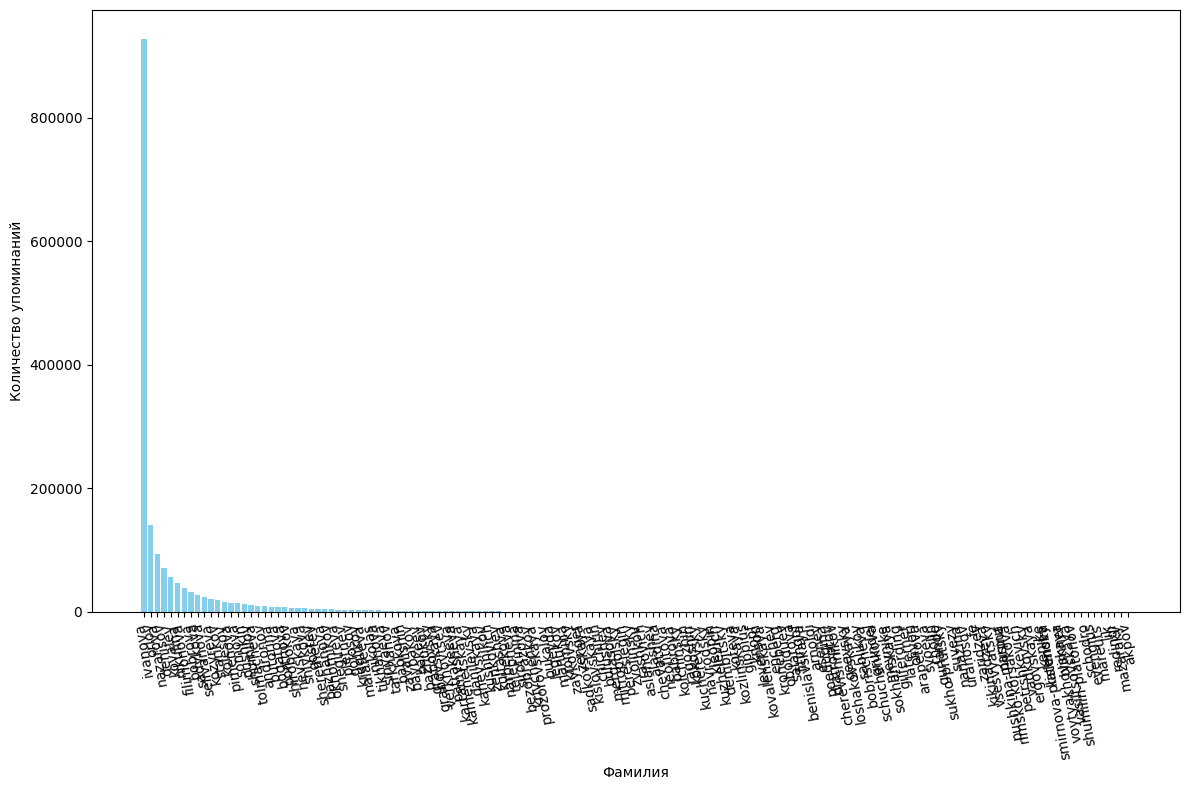

In [ ]:
#я гистограмма и я хочу, чтобы они за все заплатили
#взяты каждые 50 фамилий

import matplotlib.pyplot as plt

df = pd.read_csv('surnames_itog.csv')



all_m = df[['male_eng', 'male_cnt']].rename(columns={'male_eng': 'surname', 'male_cnt': 'count'})
all_w = df[['female_eng', 'female_cnt']].rename(columns={'female_eng': 'surname', 'female_cnt': 'count'})
combined = pd.concat([all_m, all_w], ignore_index=True)

combined['count'] = pd.to_numeric(combined['count'], errors='coerce')
combined1 = combined.dropna(subset=['count'])

cdata = combined1.sort_values(by='count', ascending=False)
fdata = cdata.iloc[::50]


plt.figure(figsize = (12, 8))
plt.bar(fdata['surname'], fdata['count'], color='skyblue')

plt.xticks(rotation = 100, fontsize=10)

plt.xlabel('Фамилия')
plt.ylabel('Количество упоминаний')

plt.tight_layout()
plt.show()
